###Libraries

In [265]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier 
from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
# importing necessary libraries from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

###Data Read and clean 


In [266]:
#Read the dataset from csv file obtained from a known platform kaggle - curated by candian government 
dataset = pd.read_csv('CO2 Emissions_dataset.csv')
#Drop all the duplicates in the dataset 
dataset.drop_duplicates()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),classify
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,2
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,2
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2


In [267]:
#check the read dataset
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),classify
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,2


In [268]:
#check if dataset has null values
dataset.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
classify                            0
dtype: int64

In [269]:
#check if dataset has any duplicate values
dataset.duplicated().sum()

1103

In [270]:
#Rename the required column 
dataset.rename(columns={'CO2 Emissions(g/km)':'CO2_emission'}, inplace=True)

In [271]:
#Putting different transmission sub-catagories into their respective catagories
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic of Selective type',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['M5','M6','M7']),'Manual',dataset['Transmission'])

In [272]:
# Renaming fuel types for better understanding
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='X','Regular gasoline',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='Z','Premium gasoline',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='E','Ethanol',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='D','Diesel',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='N','Natural gas',dataset['Fuel Type'])

In [273]:
#check the missing values 
missing_values = ["n/a", "na", "--","NA","NAN","N/A"]

In [274]:
#check the misisng values
pd.read_csv("CO2 Emissions_dataset.csv", na_values = missing_values)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),classify
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,2
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,2
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2


In [275]:
#drop duplicates 
dataset.drop_duplicates()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,classify
0,ACURA,ILX,COMPACT,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,10.7,7.7,9.4,30,219,2
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,11.2,8.3,9.9,29,232,2
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,11.7,8.6,10.3,27,240,2
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic of Selective type,Premium gasoline,11.2,8.3,9.9,29,232,2


In [276]:
#check if any duplicates 
dataset.duplicated().sum()

1112

###Classification classes


In [277]:
print(dataset.groupby('classify ').size())

classify 
0       5
1    1488
2    4475
3    1417
dtype: int64


In [278]:
#freq_dis_pos = datasetc['classify'].value_counts()
#freq_dis_pos
#pd.crosstab(index=datasetc['classify'], columns='count') 
datasetc = pd.read_csv('CO2 Emissions_dataset.csv')
print(dataset.columns.tolist())
print ("Class  Frequency")
datasetc['classify '].value_counts().sort_index(ascending=True) 


['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2_emission', 'classify ']
Class  Frequency


0       5
1    1488
2    4475
3    1417
Name: classify , dtype: int64

In [279]:
print(datasetc.groupby('classify ').size())

classify 
0       5
1    1488
2    4475
3    1417
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


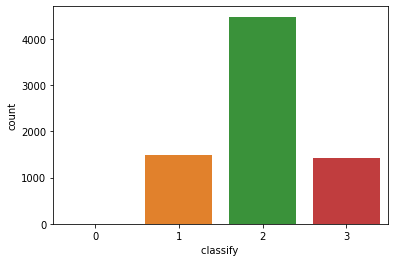

In [280]:
sns.countplot(datasetc['classify '],label="Frequency")
plt.show()

Text(0.5, 0.98, 'Scatter-matrix for each input variable')

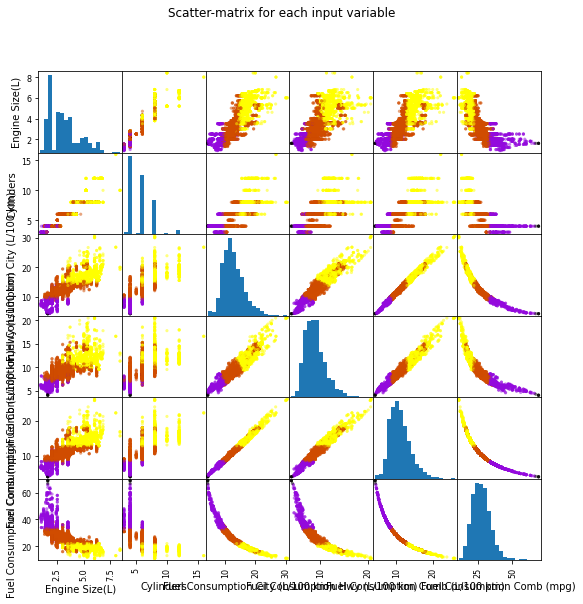

In [281]:
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

feature_name = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                'Fuel Consumption Hwy (L/100 km)',
                'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

X = datasetc[feature_name]
Y = datasetc['classify ']

cmap = plt.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = Y, marker = '.', s=40, hist_kwds={'bins':20}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')


###Feature Engineering 

In [282]:
#check the unique values of the non numerical data entries
print(dataset['Make'].value_counts())
print(dataset['Model'].value_counts())
print(dataset['Vehicle Class'].value_counts())
print(dataset['Transmission'].value_counts())
print(dataset['Fuel Type'].value_counts())

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64
F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV   

In [283]:
#0 1 2 - encoding of all the columns - rather than adding columns 
make_freq = dataset['Make'].value_counts().to_dict()
model_freq = dataset['Model'].value_counts().to_dict()
vehclass_freq = dataset['Vehicle Class'].value_counts().to_dict()
fuel_freq = dataset['Fuel Type'].value_counts().to_dict()
trans_freq = dataset['Transmission'].value_counts().to_dict()
dataset['Make'] = dataset['Make'].map(make_freq)
dataset['Model'] = dataset['Model'].map(model_freq)
dataset['Vehicle Class'] = dataset['Vehicle Class'].map(vehclass_freq)
dataset['Fuel Type'] = dataset['Fuel Type'].map(fuel_freq)
dataset['Transmission'] = dataset['Transmission'].map(trans_freq)

In [284]:
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,classify
0,72,9,1022,2.0,4,3127,3202,9.9,6.7,8.5,33,196,1
1,72,9,1022,2.4,4,1185,3202,11.2,7.7,9.6,29,221,2
2,72,2,1022,1.5,4,576,3202,6.0,5.8,5.9,48,136,1
3,72,1,1217,3.5,6,3127,3202,12.7,9.1,11.1,25,255,2
4,72,7,1217,3.5,6,3127,3202,12.1,8.7,10.6,27,244,2


In [285]:
dataset.shape

(7385, 13)

In [286]:
dataset.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2_emission', 'classify '],
      dtype='object')

In [287]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int64  
 1   Model                             7385 non-null   int64  
 2   Vehicle Class                     7385 non-null   int64  
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   int64  
 6   Fuel Type                         7385 non-null   int64  
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2_emission                      7385 non-null   int64  
 12  classi

### Split Data and Scale

In [288]:
X = dataset.drop(['CO2_emission', 'classify '], axis = 1)
X.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,72,9,1022,2.0,4,3127,3202,9.9,6.7,8.5,33
1,72,9,1022,2.4,4,1185,3202,11.2,7.7,9.6,29
2,72,2,1022,1.5,4,576,3202,6.0,5.8,5.9,48
3,72,1,1217,3.5,6,3127,3202,12.7,9.1,11.1,25
4,72,7,1217,3.5,6,3127,3202,12.1,8.7,10.6,27


In [289]:
y = dataset['CO2_emission']
yc = dataset['classify ']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state =0)
X_train, X_test, Yc_train, Yc_test = train_test_split(X, yc, test_size=0.2, random_state =0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,72,9,1022,2.0,4,3127,3202,9.9,6.7,8.5,33
1,72,9,1022,2.4,4,1185,3202,11.2,7.7,9.6,29
2,72,2,1022,1.5,4,576,3202,6.0,5.8,5.9,48
3,72,1,1217,3.5,6,3127,3202,12.7,9.1,11.1,25
4,72,7,1217,3.5,6,3127,3202,12.1,8.7,10.6,27


##Classification Methods

######Guassian Naive Bayes

In [290]:
#Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Yc_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, Yc_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, Yc_test)))

Accuracy of GNB classifier on training set: 0.83
Accuracy of GNB classifier on test set: 0.83


######SVM 


In [291]:
#SVM 
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Yc_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, Yc_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, Yc_test)))

Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.96


#####Logistic Regression

In [292]:
#logistic regression 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
Y.ravel()
logreg.fit(X_train, Y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, Y_test)))

Accuracy of Logistic regression classifier on training set: 0.12
Accuracy of Logistic regression classifier on test set: 0.07


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [293]:
#logistic regression 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
yc.ravel()
logreg.fit(X_train, Yc_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, Yc_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, Yc_test)))

Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.95


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Make
Feature: 0, Score: -0.15
Model
Feature: 1, Score: -0.53
Vehicle Class
Feature: 2, Score: -0.37
Engine Size(L)
Feature: 3, Score: -0.06
Cylinders
Feature: 4, Score: 0.17
Transmission
Feature: 5, Score: -0.24
Fuel Type
Feature: 6, Score: 0.01
Fuel Consumption City (L/100 km)
Feature: 7, Score: -0.74
Fuel Consumption Hwy (L/100 km)
Feature: 8, Score: -1.23
Fuel Consumption Comb (L/100 km)
Feature: 9, Score: -0.93
Fuel Consumption Comb (mpg)
Feature: 10, Score: 4.87


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


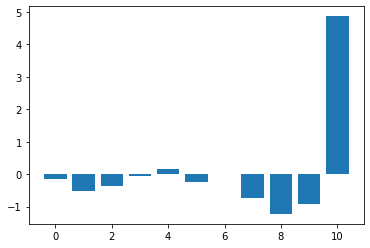

In [294]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_train, Yc_train)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
  print(X.columns[i])
  print('Feature: %0d, Score: %.2f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

####KNN

In [295]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Yc_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, Yc_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, Yc_test)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.95


########KNN plots 

In [296]:
k = 2
print("k=",k)
neigh2 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Yc_train)
ypredict2 = neigh2.predict(X_test)
print("Train set Accuracy: {:.2f}".format( metrics.accuracy_score(Yc_train, neigh2.predict(X_train))))
print("Test set Accuracy: {:.2f}".format( metrics.accuracy_score(Yc_test, ypredict2 )))

k = 5
print("k=",k)
neigh5 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Yc_train)
ypredict5 = neigh5.predict(X_test)
print("Train set Accuracy: {:.2f}".format(metrics.accuracy_score(Yc_train, neigh5.predict(X_train))))
print("Test set Accuracy: {:.2f}".format(metrics.accuracy_score(Yc_test, ypredict5 )))


k = 10
print("k=",k)
neigh10 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Yc_train)
ypredict10 = neigh10.predict(X_test)
print("Train set Accuracy: {:.2f} ".format(metrics.accuracy_score(Yc_train, neigh10.predict(X_train))))
print("Test set Accuracy: {:.2f}".format(metrics.accuracy_score(Yc_test, ypredict10 )))

k= 2
Train set Accuracy: 0.98
Test set Accuracy: 0.96
k= 5
Train set Accuracy: 0.97
Test set Accuracy: 0.95
k= 10
Train set Accuracy: 0.96 
Test set Accuracy: 0.94


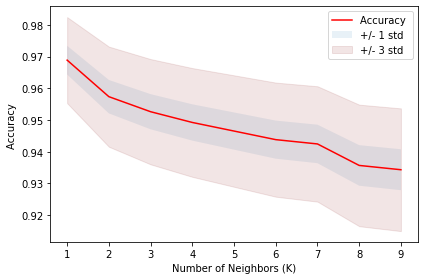

The best accuracy was with 0.97


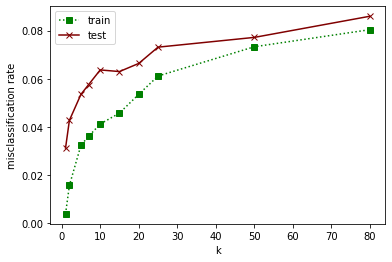

In [297]:
# We can calculate the accuracy of KNN for different values of k.
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Yc_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Yc_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Yc_test)/np.sqrt(yhat.shape[0])

mean_acc


# Plot the model accuracy for a different number of neighbors and best value for K
plt.plot(range(1,10),mean_acc,'r')
plt.fill_between(range(1,10),mean_acc - 1 * std_acc,mean_acc + 1 * 
                 std_acc, alpha=0.10)
plt.fill_between(range(1,10),mean_acc - 3 * std_acc,mean_acc + 3 *
                 std_acc, alpha=0.10,color="maroon")
plt.legend(('Accuracy ', '+/- 1 std','+/- 3 std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with {:.2f}".format(mean_acc.max(), "with k=", mean_acc.argmax()+1))

# Hint: Plot misclassification rate vs k and observe
ks = [1, 2, 5, 7, 10, 15, 20, 25, 50, 80]
train_errors = []
test_errors = []
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Yc_train)
  train_errors.append(1 - knn.score(X_train, Yc_train))
  test_errors.append(1 - knn.score(X_test, Yc_test))
plt.figure()
plt.plot(ks, train_errors, 'bs:', label='train', color="green")
plt.plot(ks, test_errors, 'rx-', label='test', color ="maroon")
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')
plt.show()

In [298]:
k = 1
print("k=",k)
neigh1 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Yc_train)
ypredict1 = neigh1.predict(X_test)
print("Train set Accuracy:{:.2f}".format(metrics.accuracy_score(Yc_train, neigh1.predict(X_train))))
print("Test set Accuracy:{:.2f} ".format(metrics.accuracy_score(Yc_test, ypredict1 )))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Yc_test, ypredict1, labels=[1,0]))
print(classification_report(Yc_test, ypredict1))



k= 1
Train set Accuracy:1.00
Test set Accuracy:0.97 
[[285   0]
 [  1   1]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.96      0.97      0.96       294
           2       0.97      0.98      0.97       889
           3       0.98      0.93      0.96       292

    accuracy                           0.97      1477
   macro avg       0.98      0.85      0.89      1477
weighted avg       0.97      0.97      0.97      1477



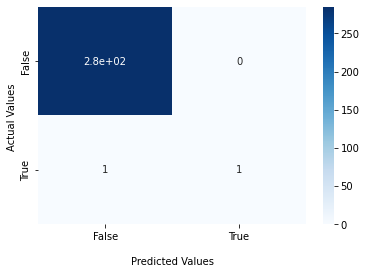

In [299]:
cnf_matrix = confusion_matrix(Yc_test, ypredict1, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
import seaborn as sns

ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


Make
Feature: 0, Score: 0.02
Model
Feature: 1, Score: 0.02
Vehicle Class
Feature: 2, Score: 0.02
Engine Size(L)
Feature: 3, Score: 0.04
Cylinders
Feature: 4, Score: 0.03
Transmission
Feature: 5, Score: 0.02
Fuel Type
Feature: 6, Score: 0.05
Fuel Consumption City (L/100 km)
Feature: 7, Score: 0.07
Fuel Consumption Hwy (L/100 km)
Feature: 8, Score: 0.09
Fuel Consumption Comb (L/100 km)
Feature: 9, Score: 0.08
Fuel Consumption Comb (mpg)
Feature: 10, Score: 0.11


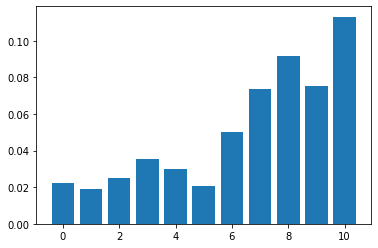

In [300]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

model = KNeighborsClassifier()
# fit the model
model.fit(X_train, Yc_train)
# perform permutation importance
results = permutation_importance(model, X_train, Yc_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
  print(X.columns[i])
  print('Feature: %0d, Score: %.2f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [301]:
feature5 = dataset[['Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)',
                    'Fuel Type','Fuel Consumption City (L/100 km)',
                    'Fuel Consumption Hwy (L/100 km)']]
label5 = dataset['CO2_emission']
feature5_train, feature5_test, label5_train, label5_test = train_test_split(feature5, label5, test_size=0.2, random_state =0)
scaler = StandardScaler()
feature5_train = scaler.fit_transform(feature5_train)
feature5_test = scaler.transform(feature5_test)
rf_model5 = KNeighborsClassifier()
rf_model5.fit(feature5_train, label5_train)
y_predimp5 = rf_model5.predict(feature5_test)
y_predimp5
print('RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(label5_test,y_predimp5))))
print('MAE: {:0.2f}'.format(mean_absolute_error(label5_test,y_predimp5)))
print('R2_score: {:0.2f}'.format(r2_score(label5_test,y_predimp5)))

RMSE: 4.45
MAE: 2.48
R2_score: 0.99


In [302]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))

Accuracy of K-NN classifier on training set: 0.44
Accuracy of K-NN classifier on test set: 0.17


###Random Forest Classification 

In [303]:
from sklearn.ensemble import RandomForestClassifier
rf_classify = RandomForestClassifier()
rf_classify.fit(X_train,Yc_train)
rf_classifypredict = rf_classify.predict(X_test)
rf_classifytrain = rf_classify.predict(X_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf_classify.score(X_train, Yc_train)))
print('Accuracy of Random classifier on test set: {:.2f}'
     .format(rf_classify.score(X_test, Yc_test)))
conf_m = confusion_matrix(Yc_test, rf_classifypredict)
print(conf_m)

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random classifier on test set: 0.98
[[  2   0   0   0]
 [  0 291   3   0]
 [  0  10 874   5]
 [  0   0   7 285]]


In [304]:
import numpy.random as nr
import sklearn.model_selection as ms
from sklearn import feature_selection as fs
# define a random state number for all random operations - ensures reproducibility of all results
random_state_num = 0
# Set folds for cross validation for the feature selection
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the model
rf_selector = RandomForestClassifier(random_state=random_state_num) 

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(X_train, np.ravel(Yc_train))
selector.support_

print("Feature ranking after RFECV:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(X.columns,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[1 1 1 1 1 2 1 1 1 1 1]
Chosen important features:
['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']


In [305]:
# assign only the important variables to the features array of both training and testing dataset
features_train_reduced = selector.transform(X_train)
features_test_reduced = selector.transform(X_test)

print("Training subset shape before the recursive feature elimination:")
print(X_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(5908, 11)
Training subset array shape after the recursive feature elimination:
(5908, 10)
Test subset array shape after the recursive feature elimination:
(1477, 10)


In [306]:
rf_s = RandomForestClassifier()
rf_s.fit(features_train_reduced,Yc_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf_s.score(features_train_reduced, Yc_train)))
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf_s.score(features_test_reduced, Yc_test)))

Accuracy of random forest classifier on training set: 1.00
Accuracy of random forest classifier on test set: 0.98


In [307]:
import numpy.random as nr
import sklearn.model_selection as ms
from sklearn import feature_selection as fs
# define a random state number for all random operations - ensures reproducibility of all results
random_state_num = 0
# Set folds for cross validation for the feature selection
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the model
rf_selector = RandomForestRegressor(random_state=random_state_num) 

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(X_train, np.ravel(Y_train))
selector.support_

print("Feature ranking after RFECV:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(X.columns,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[3 4 5 1 1 6 1 1 2 1 1]
Chosen important features:
['Engine Size(L)', 'Cylinders', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']


In [308]:
# assign only the important variables to the features array of both training and testing dataset
features_train_reduced = selector.transform(X_train)
features_test_reduced = selector.transform(X_test)

print("Training subset shape before the recursive feature elimination:")
print(X_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(5908, 11)
Training subset array shape after the recursive feature elimination:
(5908, 6)
Test subset array shape after the recursive feature elimination:
(1477, 6)


In [309]:
from sklearn.ensemble import RandomForestClassifier
rf_classify = RandomForestClassifier()
rf_classify.fit(features_train_reduced,Yc_train)
rf_classifypredict = rf_classify.predict(features_test_reduced)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf_classify.score(features_train_reduced, Yc_train)))
print('Accuracy of Random classifier on test set: {:.2f}'
     .format(rf_classify.score(features_test_reduced, Yc_test)))
conf_m = confusion_matrix(Yc_test, rf_classifypredict)
print(conf_m)
#print(f"The accuracy of the model is {round(accuracy_score(Yc_test,rf_classifypredict),3)*100} %")

Accuracy of Random Forest classifier on training set: 0.99
Accuracy of Random classifier on test set: 0.98
[[  2   0   0   0]
 [  0 289   5   0]
 [  0   9 877   3]
 [  0   0   8 284]]


In [310]:
feature5 = dataset[['Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','Fuel Type','Fuel Consumption City (L/100 km)','Engine Size(L)']]
label5 = dataset['CO2_emission']
feature5_train, feature5_test, label5_train, label5_test = train_test_split(feature5, label5, test_size=0.2, random_state =0)
scaler = StandardScaler()
feature5_train = scaler.fit_transform(feature5_train)
feature5_test = scaler.transform(feature5_test)
feature5.head()
rf_model5 = RandomForestClassifier()
rf_model5.fit(feature5_train, label5_train)
y_predimp5 = rf_model5.predict(feature5_test)
y_predimp5
y_predimp51 = rf_model5.predict(feature5_train)
print('RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(label5_test,y_predimp5))))
print('MAE: {:0.2f}'.format(mean_absolute_error(label5_test,y_predimp5)))
print('R2_score: {:0.2f}'.format(r2_score(label5_test,y_predimp5)))
print('R2_score: {:0.2f}'.format(r2_score(label5_train,y_predimp51)))

RMSE: 7.84
MAE: 2.19
R2_score: 0.98
R2_score: 1.00


####Analysis of Random Forest 
confusion matrix, precision, f1score, recall
ROC curve : False positive rate : 
false postive rate : ratio of false positives to actual number of negatives.
(model predicts low emission actually it is not)



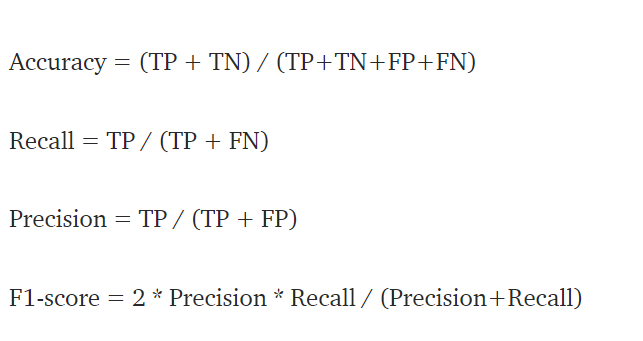

In [311]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
accuracy_score(Y_test,rf_classifypredict)
print(f"The accuracy of the model is {round(accuracy_score(Yc_test,label5_test),3)*100} %")

The accuracy of the model is 0.0 %


###LDA

#####Linear Discriminant Analysis

In [312]:
#Linear Discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Yc_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, Yc_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, Yc_test)))

Accuracy of LDA classifier on training set: 0.90
Accuracy of LDA classifier on test set: 0.90


In [313]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
  
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train1 = lda.fit_transform(X_train, Yc_train)
X_test1 = lda.transform(X_test)
X_train1.shape

(5908, 2)

In [314]:
print(X_train1)

[[-1.45 -0.51]
 [ 2.18  0.81]
 [-1.42 -0.33]
 ...
 [ 2.45  0.68]
 [ 1.66 -0.44]
 [-1.78 -0.11]]


Accuracy of Random Forest classifier on training set: 0.91
Accuracy of Random classifier on test set: 0.90
Accuracy : 0.9011509817197021
[[  0   2   0   0]
 [  0 266  22   6]
 [  0  20 814  55]
 [  0   0  41 251]]


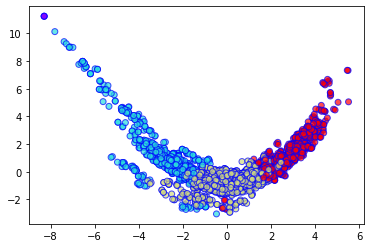

In [315]:
  
# plot the scatterplot
plt.scatter(
    X_train1[:,0],X_train1[:,1],c=Yc_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)
  
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train1, Yc_train)
y_pred = classifier.predict(X_test1)
  
# print the accuracy and confusion matrix
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(classifier.score(X_train1, Yc_train)))
print('Accuracy of Random classifier on test set: {:.2f}'
     .format(classifier.score(X_test1, Yc_test)))
print('Accuracy : ' + str(accuracy_score(Yc_test, y_pred)))
conf_m = confusion_matrix(Yc_test, y_pred)
print(conf_m)

In [316]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# grid search shrinkage for lda
from numpy import arange
# define model
model_tunelda = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model_tunelda, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results_tunelda = search.fit(X_train, Yc_train)
# summarize
print('Mean Accuracy: %.2f' % results_tunelda.best_score_)
print('Config: %s' % results_tunelda.best_params_)


model_tunelda1 = LinearDiscriminantAnalysis(solver='lsqr')
grid['shrinkage'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model_tunelda1, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results_tunelda1 = search.fit(X_train, Yc_train)
# summarize
print('Mean Accuracy: %.2f' % results_tunelda1.best_score_)
print('Config: %s' % results_tunelda1.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,


Mean Accuracy: 0.90
Config: {'solver': 'svd'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,


Mean Accuracy: 0.90
Config: {'shrinkage': 0.1, 'solver': 'lsqr'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3000 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 583, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mod

#####Linear Discriminant Analysis

In [317]:
#Linear Discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Yc_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, Yc_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, Yc_test)))

Accuracy of LDA classifier on training set: 0.90
Accuracy of LDA classifier on test set: 0.90


###PCA

In [318]:
from sklearn.decomposition import PCA
  
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(X_train)
pca.fit(X_test)
x_pca = pca.transform(X_train)
xt_pca = pca.transform(X_test)
x_pca.shape


(5908, 2)

Text(0, 0.5, 'Second Principal Component')

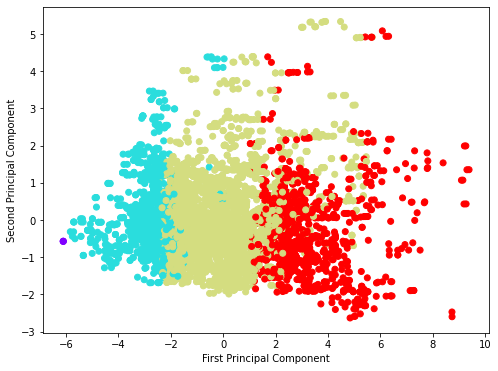

In [319]:
# giving a larger plot
plt.figure(figsize =(8, 6))
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = Yc_train , cmap ='rainbow')
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [320]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_pca, Yc_train)
y_pred = classifier.predict(xt_pca)
  
# print the accuracy and confusion matrix
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(classifier.score(x_pca, Yc_train)))
print('Accuracy of Random classifier on test set: {:.2f}'
     .format(classifier.score(xt_pca, Yc_test)))
print('Accuracy : ' + str(accuracy_score(Yc_test, y_pred)))
conf_m = confusion_matrix(Yc_test, y_pred)
print(conf_m)

Accuracy of Random Forest classifier on training set: 0.79
Accuracy of Random classifier on test set: 0.77
Accuracy : 0.7657413676371022
[[  0   2   0   0]
 [  0 251  43   0]
 [  0  30 858   1]
 [  0   0 270  22]]


###Decision Tree Classification

In [321]:
#Decision tree 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, Y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))

Accuracy of Decision Tree classifier on training set: 0.93
Accuracy of Decision Tree classifier on test set: 0.52


Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.98


[Text(0.3662703804347826, 0.9666666666666667, 'X[9] <= -0.834\ngini = 0.554\nsamples = 5908\nvalue = [3, 1194, 3586, 1125]'),
 Text(0.09456521739130434, 0.9, 'X[6] <= -1.786\ngini = 0.07\nsamples = 1191\nvalue = [3, 1148, 40, 0]'),
 Text(0.034782608695652174, 0.8333333333333334, 'X[10] <= 1.386\ngini = 0.465\nsamples = 68\nvalue = [0, 43, 25, 0]'),
 Text(0.02608695652173913, 0.7666666666666667, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 23, 0]'),
 Text(0.043478260869565216, 0.7666666666666667, 'X[3] <= -0.818\ngini = 0.085\nsamples = 45\nvalue = [0, 43, 2, 0]'),
 Text(0.02608695652173913, 0.7, 'X[10] <= 1.524\ngini = 0.045\nsamples = 43\nvalue = [0, 42, 1, 0]'),
 Text(0.017391304347826087, 0.6333333333333333, 'X[8] <= -1.381\ngini = 0.219\nsamples = 8\nvalue = [0, 7, 1, 0]'),
 Text(0.008695652173913044, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(0.02608695652173913, 0.5666666666666667, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0]'),
 Text(0.03478260869

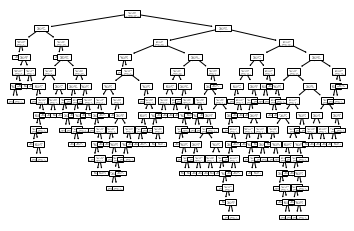

In [322]:
#Decision tree 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, Yc_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, Yc_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, Yc_test)))
tree.plot_tree(clf)

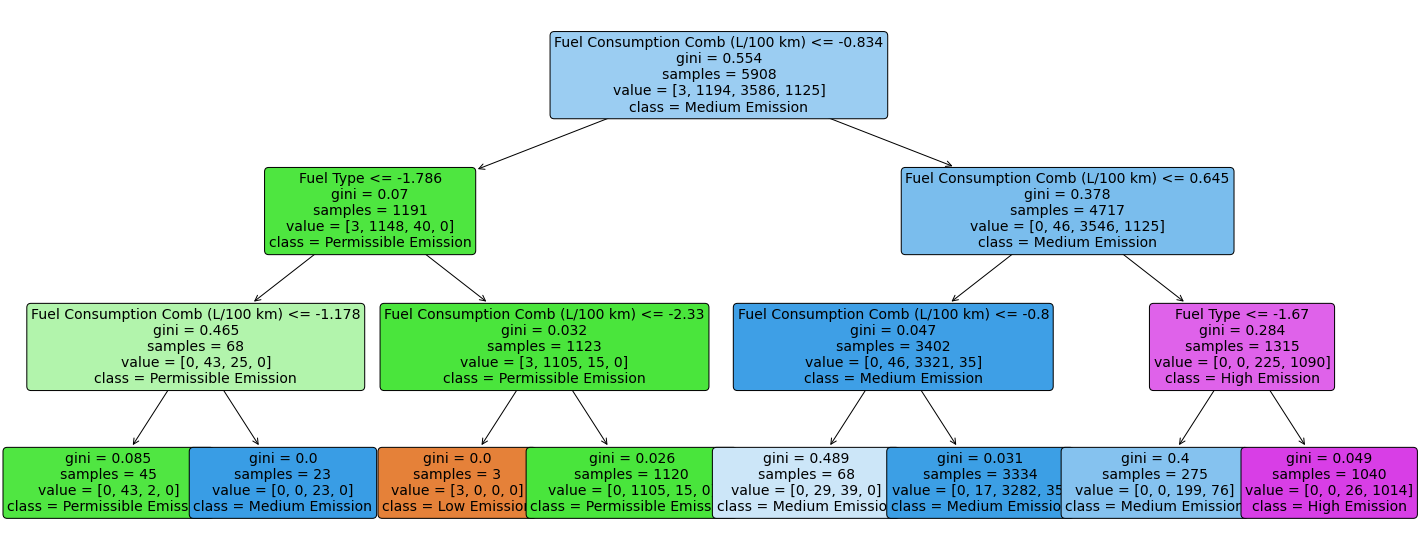

In [323]:
clf = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree
clf.fit(X_train,Yc_train)

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=X.columns, 
              class_names=['Low Emission','Permissible Emission','Medium Emission','High Emission'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

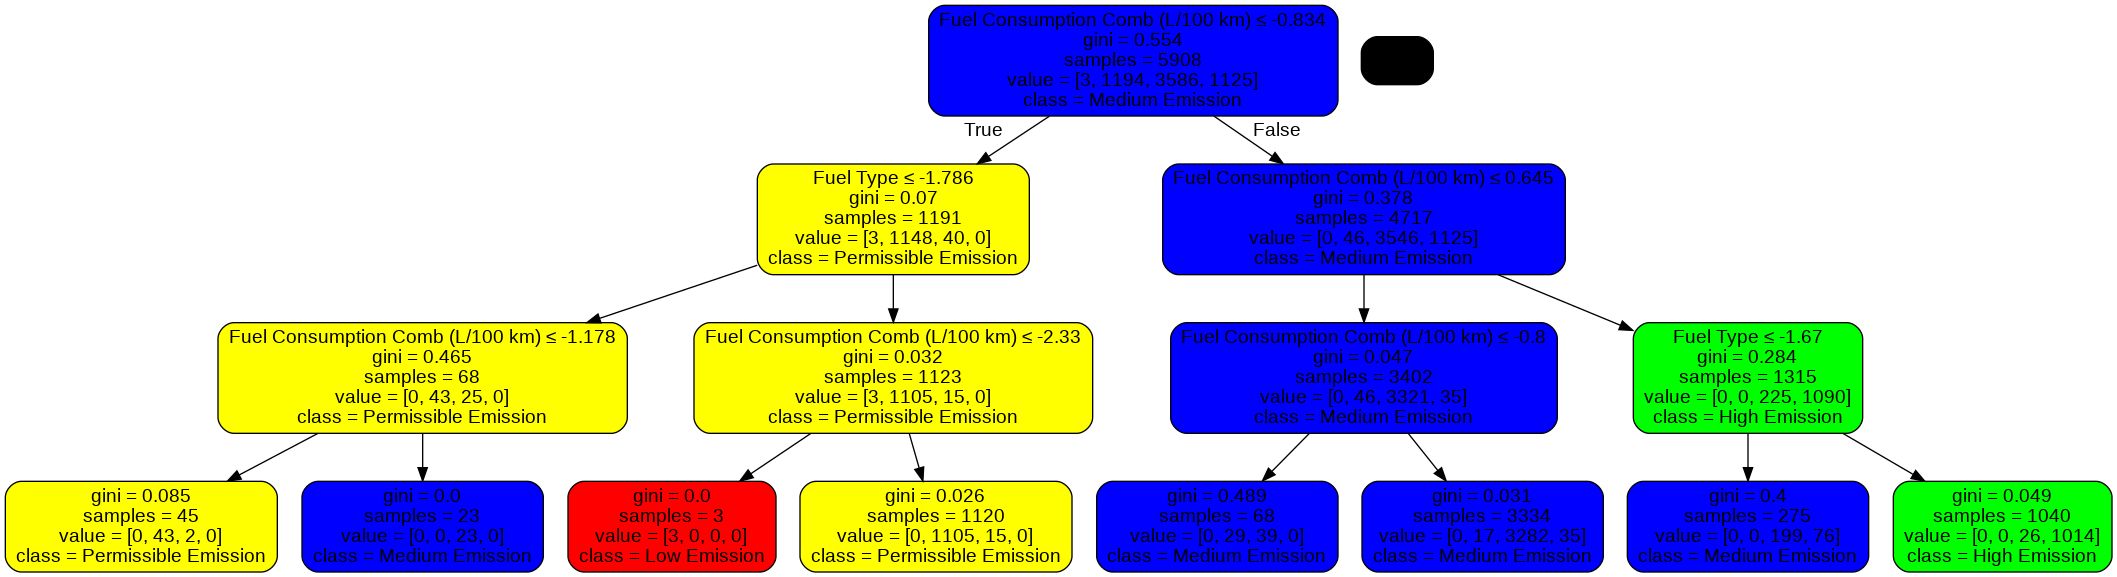

In [324]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import graphviz
from IPython.display import Image, display
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Low Emission','Permissible Emission','Medium Emission','High Emission'], 
                                filled=True, rounded=True,  
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('red', 'yellow', 'blue','green')
nodes = graph.get_node_list()

for node in nodes:
  if node.get_label():
    values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
    color = '#{:02x}{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2], values[3])
    node.set_fillcolor(colors[np.argmax(values)])

graph.write_png('colored_tree.png')



def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

viewPydot(graph)

####Feature Importance Decision Tree

In [325]:
import numpy.random as nr
import sklearn.model_selection as ms
from sklearn import feature_selection as fs
# define a random state number for all random operations - ensures reproducibility of all results
random_state_num = 0
# Set folds for cross validation for the feature selection
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the model
rf_selector = DecisionTreeRegressor(random_state=random_state_num) 

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(X_train, np.ravel(Y_train))
selector.support_

print("Feature ranking after RFECV:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(X.columns,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[4 6 7 3 9 8 1 1 5 1 2]
Chosen important features:
['Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)']


In [326]:
# assign only the important variables to the features array of both training and testing dataset
features_train_reduced = selector.transform(X_train)
features_test_reduced = selector.transform(X_test)

print("Training subset shape before the recursive feature elimination:")
print(X_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(5908, 11)
Training subset array shape after the recursive feature elimination:
(5908, 3)
Test subset array shape after the recursive feature elimination:
(1477, 3)


In [327]:
ds_classify = DecisionTreeClassifier()
ds_classify.fit(features_train_reduced,Yc_train)
ds_classifypredict = ds_classify.predict(features_test_reduced)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(ds_classify.score(features_train_reduced, Yc_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'
     .format(ds_classify.score(features_test_reduced, Yc_test)))
conf_m = confusion_matrix(Yc_test, ds_classifypredict)
print(conf_m)

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree Classifier on test set: 0.98
[[  2   0   0   0]
 [  0 292   2   0]
 [  0  13 869   7]
 [  0   0  10 282]]


####Compare classification

In [328]:
#decisision tree, KNN and Random forest works best


clf = DecisionTreeClassifier()
clf.fit(X_train,Yc_train)
pred = clf.predict(X_test)
print(confusion_matrix(Yc_test, pred))
print(classification_report(Yc_test, pred))


rf = RandomForestClassifier()
rf.fit(X_train,Yc_train)
pred = clf.predict(X_test)
print(confusion_matrix(Yc_test, pred))
print(classification_report(Yc_test, pred))

knn = KNeighborsClassifier()
knn.fit(X_train, Yc_train)
pred = knn.predict(X_test)
print(confusion_matrix(Yc_test, pred))
print(classification_report(Yc_test, pred))

[[  1   1   0   0]
 [  0 292   2   0]
 [  0  13 871   5]
 [  0   0  12 280]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.95      0.99      0.97       294
           2       0.98      0.98      0.98       889
           3       0.98      0.96      0.97       292

    accuracy                           0.98      1477
   macro avg       0.98      0.86      0.90      1477
weighted avg       0.98      0.98      0.98      1477

[[  1   1   0   0]
 [  0 292   2   0]
 [  0  13 871   5]
 [  0   0  12 280]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.95      0.99      0.97       294
           2       0.98      0.98      0.98       889
           3       0.98      0.96      0.97       292

    accuracy                           0.98      1477
   macro avg       0.98      0.86      0.90      1477
weighted avg       0.98      0.

##Classification Methods and its Accuracy on the dataset

In [329]:
models =['logistic regression classifier']
frame = pd.DataFrame(columns={'models':[],'accuracy_train':[] ,'accuracy_test':[]})
for i in range(len(models)):
    if models[i] == 'logistic regression classifier':
        #logistic regression classifier
        from sklearn.linear_model import LogisticRegression
        models = LogisticRegression()
        Y.ravel()
        models.fit(X_train, Yc_train)
        accuracy_train = format(models.score(X_train, Yc_train), '.2f')
        accuracy_test = format(models.score(X_test, Yc_test), '.2f')
        frame.loc[frame.shape[0]] = ['logistic regression classifier',accuracy_train,accuracy_test]
        

models =['KNN']
for i in range(len(models)):
    if models[i] == 'KNN':
        #KNN
        from sklearn.neighbors import KNeighborsClassifier
        models = KNeighborsClassifier()
        models.fit(X_train, Yc_train)
        accuracy_train = format(models.score(X_train, Yc_train), '.2f')
        accuracy_test = format(models.score(X_test, Yc_test), '.2f')
        frame.loc[frame.shape[0]] = ['KNN',accuracy_train,accuracy_test]
        
models =['LDA']
for i in range(len(models)):
    if models[i] =='LDA':
        #Linear Discriminant analysis
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
        models = LinearDiscriminantAnalysis()
        models.fit(X_train, Yc_train)
        accuracy_train = format(models.score(X_train, Yc_train), '.2f')
        accuracy_test = format(models.score(X_test, Yc_test), '.2f')
        frame.loc[frame.shape[0]] = ['Linear Discriminant analysis',accuracy_train,accuracy_test]
        
models =['Guassian Naive Bayes']
for i in range(len(models)):
    if models[i] =='Guassian Naive Bayes':
        #Guassian Naive Bayes
        from sklearn.naive_bayes import GaussianNB
        models = GaussianNB()
        models.fit(X_train, Yc_train)
        accuracy_train = format(models.score(X_train, Yc_train), '.2f')
        accuracy_test = format(models.score(X_test, Yc_test), '.2f')
        frame.loc[frame.shape[0]] = ['Guassian Naive Bayes',accuracy_train,accuracy_test]

models =['SVM']
for i in range(len(models)):     
    if models[i] =='SVM':
        #SVM 
        from sklearn.svm import SVC
        models = SVC()
        models.fit(X_train, Yc_train)
        accuracy_train = format(models.score(X_train, Yc_train), '.2f')
        accuracy_test = format(models.score(X_test, Yc_test), '.2f')
        frame.loc[frame.shape[0]] = ['SVM',accuracy_train,accuracy_test]

models =['Decision tree classifier']
for i in range(len(models)):         
    if models[i] =='Decision tree classifier':
        #Decision tree 
        from sklearn.tree import DecisionTreeClassifier
        models = DecisionTreeClassifier()
        models.fit(X_train, Yc_train)
        accuracy_train = format(models.score(X_train, Yc_train), '.2f')
        accuracy_test = format(models.score(X_test, Yc_test), '.2f')
        frame.loc[frame.shape[0]] = ['Decision tree classifier',accuracy_train,accuracy_test]


models =['Random Forest Classifier']
for i in range(len(models)):         
    if models[i] =='Random Forest Classifier':
        #Random Forest Classifier
        from sklearn.ensemble import RandomForestClassifier
        models= RandomForestClassifier()
        models.fit(X_train,Yc_train)
        accuracy_train = format(models.score(X_train, Yc_train), '.2f')
        accuracy_test = format(models.score(X_test, Yc_test), '.2f')
        frame.loc[frame.shape[0]] = ['Random Forest Classifier',accuracy_train,accuracy_test]   

models =['PCA']
for i in range(len(models)):         
    if models[i] =='PCA':        
        #PCA
        from sklearn.decomposition import PCA
        # Let's say, components = 2
        pca = PCA(n_components = 2)
        pca.fit(X_train)
        pca.fit(X_test)
        x_pca = pca.transform(X_train)
        xt_pca = pca.transform(X_test)
        models = RandomForestClassifier(max_depth=2, random_state=0)
        models.fit(x_pca, Yc_train)
        accuracy_train = format(models.score(x_pca, Yc_train), '.2f')
        accuracy_test = format(models.score(xt_pca, Yc_test), '.2f')
        frame.loc[frame.shape[0]] = ['Principal Discriminant Analysis',accuracy_train,accuracy_test] 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [330]:
frame

,models,accuracy_train,accuracy_test
0,logistic regression classifier,0.96,0.95
1,KNN,0.97,0.95
2,Linear Discriminant analysis,0.90,0.90
3,Guassian Naive Bayes,0.83,0.83
4,SVM,0.98,0.96
5,Decision tree classifier,1.00,0.98
6,Random Forest Classifier,1.00,0.98
7,Principal Discriminant Analysis,0.79,0.77
